In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

###  Reading the CSV file

In [2]:
df = pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

###  Missing values or Null value analysis

In [4]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
df = df.dropna()

###  Data Cleaning and Univariant Analysis

In [6]:
df['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [7]:
df['AREA'] = df['AREA'].replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet",
                                 "TNagar":"T Nagar","Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar",
                                 "Velchery":"Velachery","Ann Nagar":"Anna Nagar","Adyr":"Adyar",
                                 "KKNagar":"KK Nagar"})

In [8]:
df['AREA'].value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

In [9]:
df['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [10]:
df['SALE_COND'] = df['SALE_COND'].replace({"Adj Land":"AdjLand","Ab Normal":"AbNormal",
                                           "Partiall":"Partial","PartiaLl":"Partial"})

In [11]:
df['SALE_COND'].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

In [12]:
df['PARK_FACIL'].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [13]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({"Noo":"No"})

In [14]:
df['PARK_FACIL'].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

In [15]:
df['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [16]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({"Comercial":"Commercial","Other":"Others"})

In [17]:
df['BUILDTYPE'].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

In [18]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [19]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({"All Pub":"AllPub"})

In [20]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64

In [21]:
df['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [22]:
df['STREET'] = df['STREET'].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [23]:
df['STREET'].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

In [24]:
df['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [25]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [26]:
age1 = []
age2 = []
for i in df['DATE_SALE']:
    i = i.split("-")
    age1.append(int(i[-1]))
for i in df['DATE_BUILD']:
    i = i.split("-")
    age2.append(int(i[-1]))
age= []
for i in range(len(age1)):
    age.append(age1[i] - age2[i])
df["Age_Of_House"] = age

In [27]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Age_Of_House
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


### Checking the distance from the house to the mainroad

In [28]:
m= []
for i in df["AREA"]:
    if i not in m:
        m.append(i)
for i in m:
    v= df[df["AREA"] == i]["DIST_MAINROAD"].mean()
    print(i,v)

Karapakkam 101.04562178072112
Anna Nagar 100.3963963963964
Adyar 101.42522756827049
Velachery 94.73333333333333
Chrompet 98.07865168539325
KK Nagar 100.74343434343434
T Nagar 103.6020202020202


C:\Users\USER\AppData\Local\Temp\ipykernel_23272\1495044978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SALES_PRICE"])


<AxesSubplot: xlabel='SALES_PRICE', ylabel='Density'>

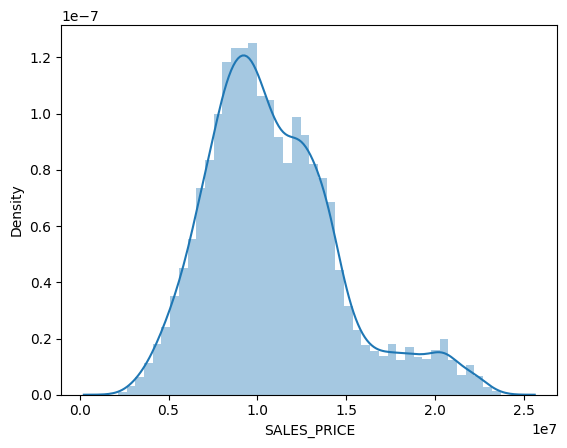

In [29]:
sns.distplot(df["SALES_PRICE"])

##  Bi-Variant analysis (Feature vs Target variable)

<AxesSubplot: xlabel='Age_Of_House', ylabel='SALES_PRICE'>

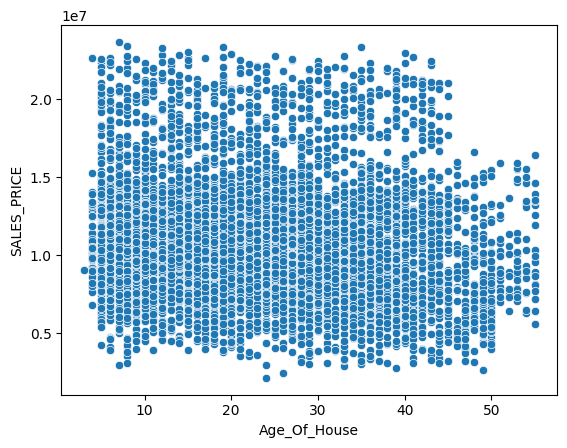

In [30]:
sns.scatterplot(x="Age_Of_House",y="SALES_PRICE",data=df)

<AxesSubplot: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

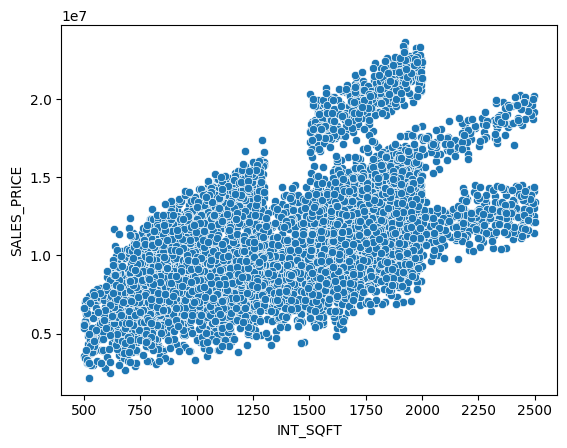

In [31]:
sns.scatterplot(x="INT_SQFT",y="SALES_PRICE",data=df)

<AxesSubplot: xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

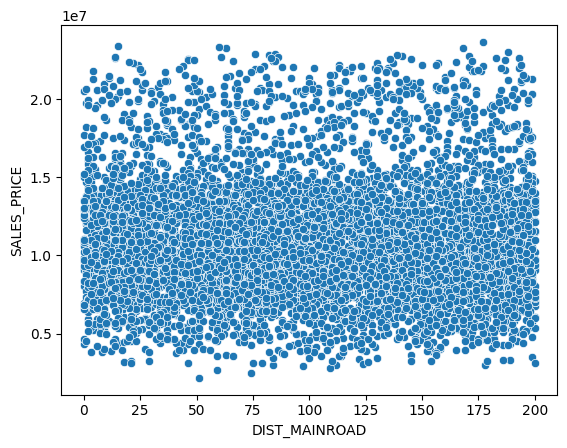

In [32]:
sns.scatterplot(x="DIST_MAINROAD",y="SALES_PRICE",data=df)

<AxesSubplot: xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

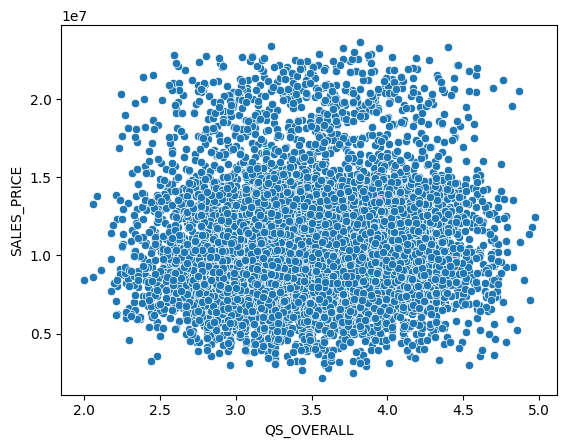

In [33]:
sns.scatterplot(x="QS_OVERALL",y="SALES_PRICE",data=df)

<AxesSubplot: xlabel='AREA'>

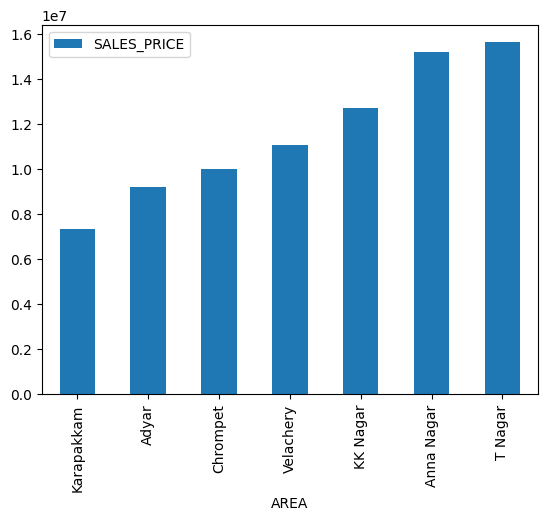

In [34]:
df[["AREA","SALES_PRICE"]].groupby("AREA").mean().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot: xlabel='SALE_COND'>

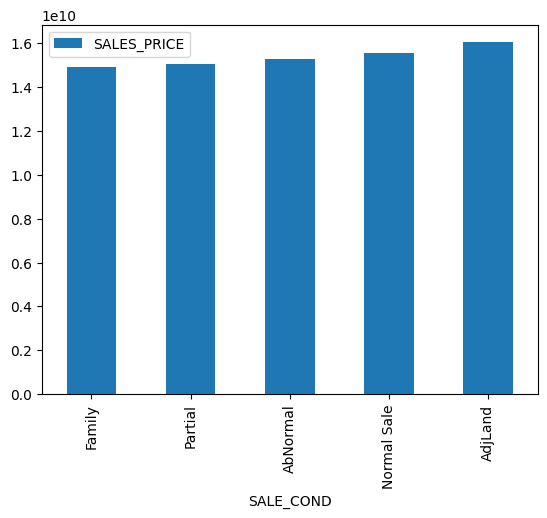

In [35]:
df[["SALE_COND","SALES_PRICE"]].groupby("SALE_COND").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot: xlabel='AREA'>

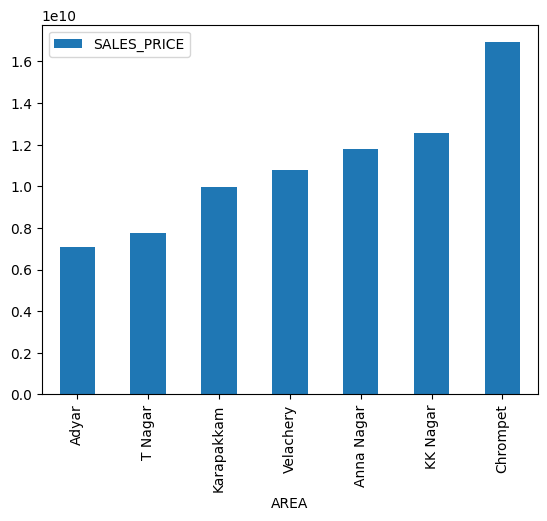

In [36]:
df[["AREA","SALES_PRICE"]].groupby("AREA").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [37]:
df = df.drop(columns=["DIST_MAINROAD"])

<AxesSubplot: xlabel='N_BEDROOM'>

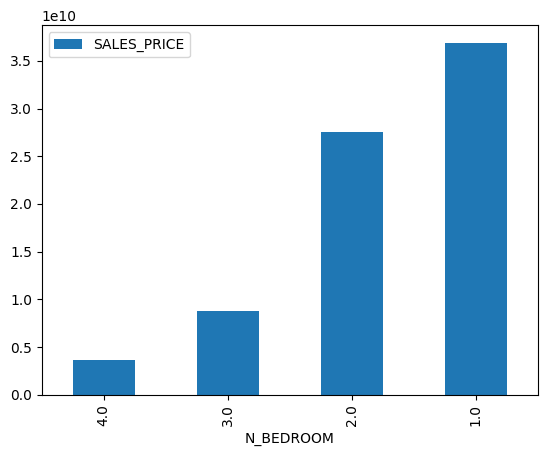

In [38]:
df[["N_BEDROOM","SALES_PRICE"]].groupby('N_BEDROOM').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot: xlabel='N_BATHROOM'>

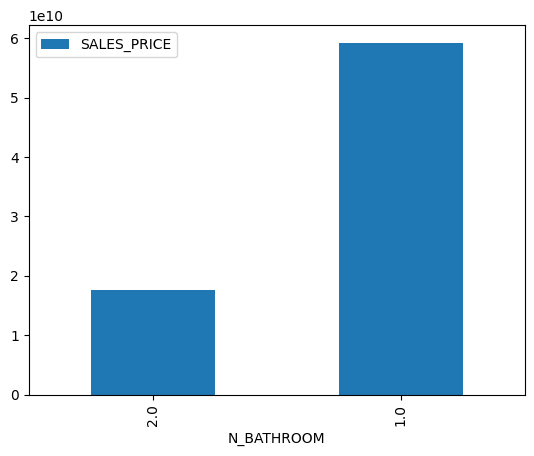

In [39]:
df[["N_BATHROOM","SALES_PRICE"]].groupby('N_BATHROOM').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot: xlabel='N_ROOM'>

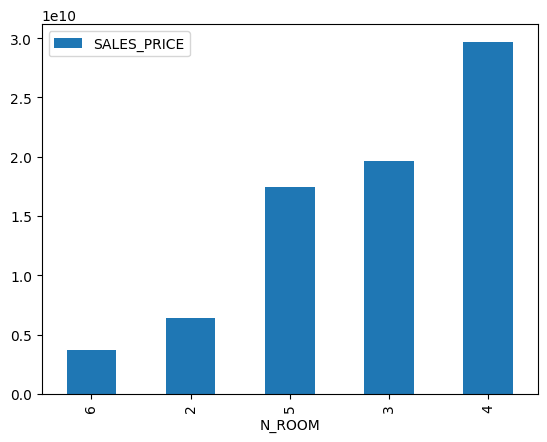

In [40]:
df[["N_ROOM","SALES_PRICE"]].groupby('N_ROOM').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [41]:
df= df.drop(columns=['PRT_ID','N_BEDROOM', 'N_BATHROOM','REG_FEE', 'COMMIS'])

In [42]:
df.shape

(7056, 17)

In [43]:
df[["SALE_COND","SALES_PRICE"]].groupby("SALE_COND").sum().sort_values(by=["SALES_PRICE"])

,SALES_PRICE
SALE_COND,
Family,14894893335
Partial,15042839730
AbNormal,15287901540
Normal Sale,15563938915
AdjLand,16036212455


In [44]:
df = df.drop(columns= ["SALE_COND"])

<AxesSubplot: xlabel='BUILDTYPE'>

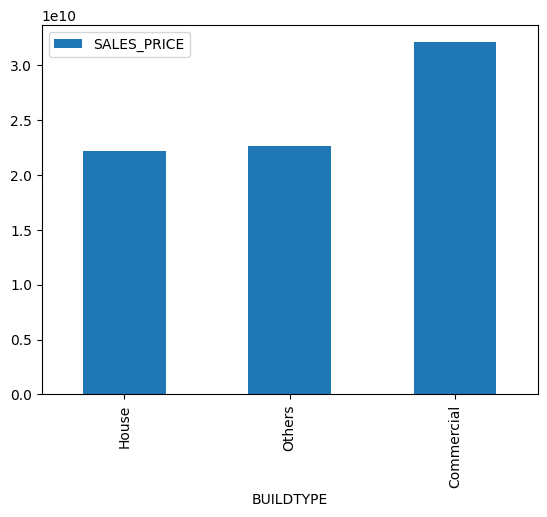

In [45]:
df[["BUILDTYPE","SALES_PRICE"]].groupby('BUILDTYPE').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [46]:
df[["BUILDTYPE","SALES_PRICE"]].groupby('BUILDTYPE').sum().sort_values(by=["SALES_PRICE"])

,SALES_PRICE
BUILDTYPE,
House,22132076115
Others,22644937550
Commercial,32048772310


<AxesSubplot: xlabel='UTILITY_AVAIL'>

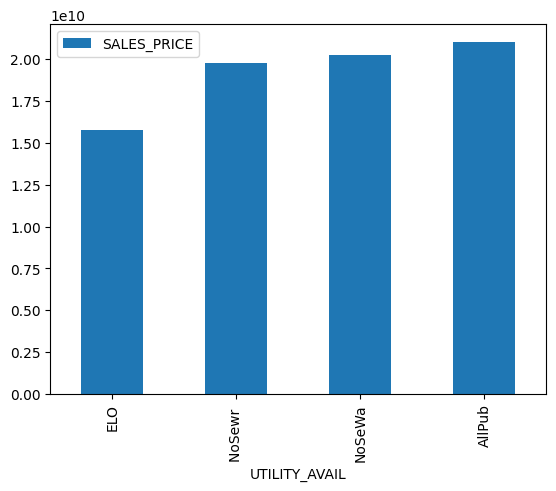

In [47]:
df[["UTILITY_AVAIL","SALES_PRICE"]].groupby('UTILITY_AVAIL').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [48]:
df[["UTILITY_AVAIL","SALES_PRICE"]].groupby('UTILITY_AVAIL').sum().sort_values(by=["SALES_PRICE"],ascending =False)

,SALES_PRICE
UTILITY_AVAIL,
AllPub,21008856910
NoSeWa,20258857575
NoSewr,19780001295
ELO,15778070195


In [49]:
statistics.variance(df[["UTILITY_AVAIL","SALES_PRICE"]].groupby('UTILITY_AVAIL').sum().sort_values(by=["SALES_PRICE"])["SALES_PRICE"])

5.479660516137322e+18

In [50]:
df = df.drop(columns=["UTILITY_AVAIL"])

In [51]:
df = df.drop(columns=['DATE_SALE','DATE_BUILD'])

In [52]:
p = df[['PARK_FACIL','SALES_PRICE']]
print("YES:",np.mean(p[p['PARK_FACIL'] == "Yes"]["SALES_PRICE"]))
print("NO:",np.mean(p[p['PARK_FACIL'] == "No"]["SALES_PRICE"]))

YES: 11437396.82175991
NO: 10329512.855101457


<AxesSubplot: xlabel='STREET'>

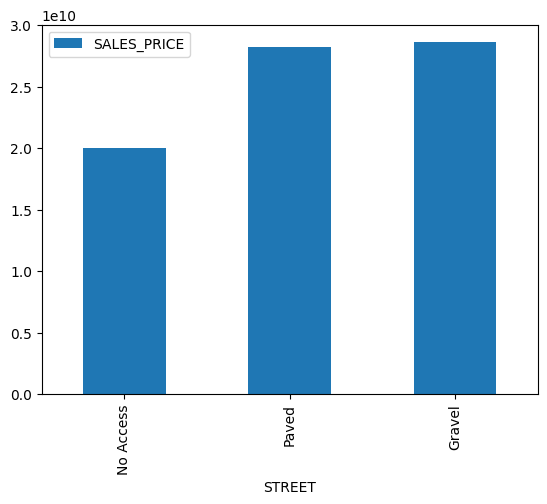

In [53]:
df[["STREET","SALES_PRICE"]].groupby('STREET').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [54]:
statistics.variance(df[["STREET","SALES_PRICE"]].groupby("STREET").mean()["SALES_PRICE"])

563448288875.645

<AxesSubplot: xlabel='MZZONE'>

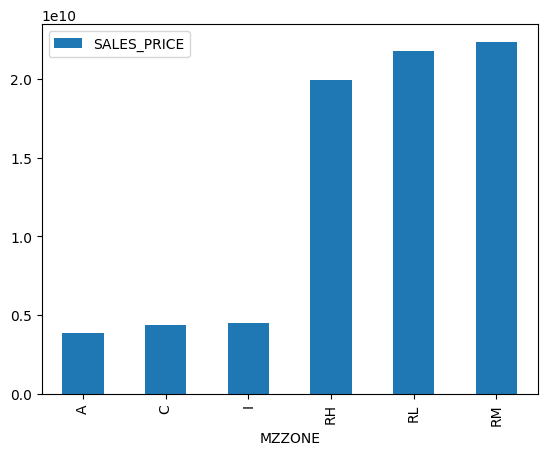

In [55]:
df[["MZZONE","SALES_PRICE"]].groupby('MZZONE').sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [56]:
df.drop(columns=['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','Age_Of_House'],axis=1,inplace=True)

##  Encoding the data based on the Sum of the Sales Price of the House with Features

In [57]:
df["AREA"] = df["AREA"].map({"Chrompet":1,"KK Nagar":2,"Anna Nagar":3,"Velachery":4,"Karapakkam":5,"T Nagar":6,"Adyar":7})

In [58]:
df["PARK_FACIL"] = df["PARK_FACIL"].map({"Yes":1,"No":0})

In [59]:
df["BUILDTYPE"] = df["BUILDTYPE"].map({"Commercial":1,"Others":2,"House":3})

In [60]:
df["STREET"] = df["STREET"].map({"Gravel":1,"Paved":2,"No Access":3})

In [61]:
df["MZZONE"] = df["MZZONE"].map({"RM":1,"RL":2,"RH":3,"I":4,"C":5,"A":6})

In [62]:
df.head()

,AREA,INT_SQFT,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE
0,5,1004,3,1,1,2,6,7600000
1,3,1986,5,0,1,1,3,21717770
2,7,909,3,1,1,1,2,13159200
3,4,1855,5,0,2,2,4,9630290
4,5,1226,3,1,2,1,5,7406250


### Checking the Correlation

<AxesSubplot: >

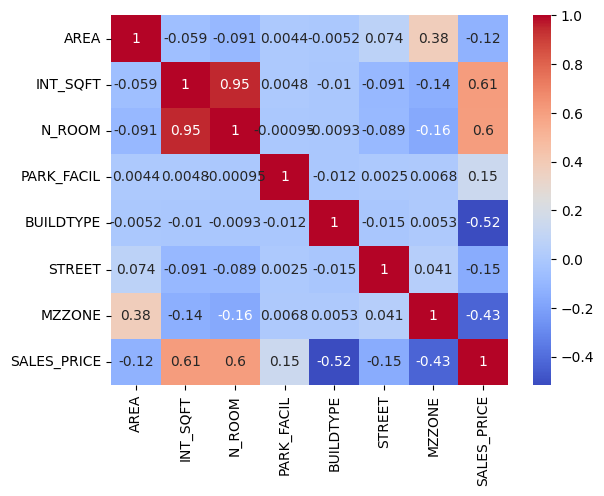

In [63]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [64]:
df.corr().sort_values(by=["SALES_PRICE"])

,AREA,INT_SQFT,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE
BUILDTYPE,-0.005231,-0.010219,-0.009284,-0.011584,1.000000,-0.014846,0.005276,-0.515823
MZZONE,0.375669,-0.142489,-0.163375,0.006849,0.005276,0.041087,1.000000,-0.427526
STREET,0.073831,-0.090918,-0.088951,0.002516,-0.014846,1.000000,0.041087,-0.150060
AREA,1.000000,-0.059020,-0.091258,0.004357,-0.005231,0.073831,0.375669,-0.121602
PARK_FACIL,0.004357,0.004771,-0.000948,1.000000,-0.011584,0.002516,0.006849,0.146975
N_ROOM,-0.091258,0.951305,1.000000,-0.000948,-0.009284,-0.088951,-0.163375,0.603417
INT_SQFT,-0.059020,1.000000,0.951305,0.004771,-0.010219,-0.090918,-0.142489,0.612668
SALES_PRICE,-0.121602,0.612668,0.603417,0.146975,-0.515823,-0.150060,-0.427526,1.000000


In [65]:
df = df.drop(columns=["N_ROOM"])

In [66]:
df.columns

Index(['AREA', 'INT_SQFT', 'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE',
       'SALES_PRICE'],
      dtype='object')

In [67]:
df

,AREA,INT_SQFT,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE
0,5,1004,1,1,2,6,7600000
1,3,1986,0,1,1,3,21717770
2,7,909,1,1,1,2,13159200
3,4,1855,0,2,2,4,9630290
4,5,1226,1,2,1,5,7406250
...,...,...,...,...,...,...,...
7104,5,598,0,2,3,1,5353000
7105,4,1897,1,2,3,3,10818480
7106,4,1614,0,3,1,4,8351410
7107,5,787,1,1,2,2,8507000


## Spliting the data

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [69]:
X = df.drop("SALES_PRICE",axis=1)
y = df["SALES_PRICE"]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [71]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2_score:",r2_score(y_test,y_pred))
print("Cross_val_cross",np.mean(cross_val_score(lr,X_train,y_train)))

R2_score: 0.7701389769038033
Cross_val_cross 0.7847299713922814


In [72]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("R2_score:",r2_score(y_test,y_pred))
print("Cross_val_cross",np.mean(cross_val_score(tree,X_train,y_train)))

R2_score: 0.9693393694021272
Cross_val_cross 0.9689245182115531


In [73]:
rnd = RandomForestRegressor()
rnd.fit(X_train,y_train)
y_pred = rnd.predict(X_test)
print("R2_score:",r2_score(y_test,y_pred))
print("Cross_val_cross",np.mean(cross_val_score(rnd,X_train,y_train)))

R2_score: 0.9820054443086105
Cross_val_cross 0.9840258726885482


In [74]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print("R2_score:",r2_score(y_test,y_pred))
print("Cross_val_cross",np.mean(cross_val_score(xgb,X_train,y_train)))

R2_score: 0.9858991444039397
Cross_val_cross 0.988238558738729


In [75]:
n = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
n

,Actual,Predict
100,7904210,8672671.0
5923,7148255,7410385.0
4696,8109400,8622930.0
4972,12772400,13043163.0
1013,6193485,6009381.5
...,...,...
1399,12761560,13096401.0
6640,8844000,8853040.0
1652,8537500,9202498.0
1924,5131250,5150350.5
